# ¿Cuál es la mejor tarifa?

## Propósito del Proyecto y Plan de Análisis
Megaline, un operador de telecomunicaciones, ofrece dos planes de prepago: **Surf** y **Ultimate**.  
El objetivo principal de este proyecto es determinar cuál de los dos planes genera más ingresos para la empresa.  

Para lograr esto, se analizarán los datos de 500 clientes de Megaline en 2018, evaluando su comportamiento en cuanto a:  
- Duración de llamadas  
- Cantidad de mensajes enviados  
- Consumo de Internet  
- Ingresos generados por cada plan  

---
El proceso de análisis se dividirá en las siguientes etapas:

1. Carga y Exploración de Datos
- Importar los datos desde los archivos proporcionados.  
- Explorar la estructura de cada tabla, verificando tipos de datos, valores nulos y duplicados.  

2. Limpieza y Preparación de Datos
- Convertir columnas de fecha a formato datetime.  
- Reemplazar valores nulos y eliminar duplicados.  
- Fusionar múltiples fuentes de datos en un DataFrame unificado.  

3. Análisis del Comportamiento de los Usuarios
- Evaluar el uso de llamadas, mensajes y datos móviles en cada plan.  
- Comparar duración promedio de llamadas, cantidad de mensajes enviados y consumo de datos.  
- Visualizar distribuciones con histogramas y diagramas de caja.  

4. Análisis de Ingresos por Plan
- Calcular ingresos generados por cada usuario (tarifa base + cargos por excedentes).  
- Identificar tendencias en los ingresos.  

5. Pruebas de Hipótesis
- Determinar si hay una diferencia significativa en los ingresos de cada plan.    

6. Conclusiones y Recomendaciones
- Determinar qué plan es más rentable.    

---

## **Objetivo Final**
Este análisis proporcionará a Megaline **datos valiosos sobre el comportamiento de sus clientes y la rentabilidad de sus planes**, permitiéndole tomar decisiones informadas para optimizar su estrategia de ventas y retención de clientes.  

---


## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Cargar datos

In [ ]:
# Cargar los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

In [3]:
# Tabla calls
print(calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [4]:
# Tabla internet 
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [5]:
# Tabla messages
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [6]:
# Tabla plans
print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [7]:
# Tabla users
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


## Tarifas

In [ ]:
# Visualizando la información general/resumida sobre el DataFrame de las tarifas

print(plans.info())
print('\nNumero de duplicados {}\n'.format(plans.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None

Numero de duplicados 0



In [ ]:
# Visualizando una muestra de los datos para las tarifas
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


En general el DataFrame parece estar bien estructurado y sin problemas evidentes. No hay datos ausentes en este DataFrame, lo cual es positivo. Los tipos de datos tambien parecen correctos ya que concuerdan con lo esperado y sus valores son parecen consistentes.


## Usuarios/as

In [ ]:
# Visualizando la información general/resumida sobre el DataFrame de usuarios

print(users.info())
print('\nNumero de duplicados {}\n'.format(users.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

Numero de duplicados 0



In [ ]:
# Visualizando una muestra de datos para usuarios

print(users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf         

- Según la descripción, las columnas reg_date y churn_date representan fechas por lo que hay que cambiarlas de tipo a datetime
- En cuanto a los valores ausentes en la columna churn_date, la descripción indica que el usuario todavía estaba activo cuando se extrajo la base de datos.
por lo que esto no es un error pero puede requerir manejo especial en análisis.
- Las columnas de user_id, first_name, last_name, city y plan tienen el tipo de dato correcto

### Corregir los datos

In [12]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

Se aplico ese formato en las fechas porque hay valores que sigue ese patron

In [ ]:
# Comprobando los cambios
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


### Enriquecer los datos

Se pueden reemplazar los valores nulos con un valor descriptivo como "Active"

In [14]:
users['churn_date'].fillna('Active', inplace = True)
# Comprobando el resultado
print(users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

    reg_date      plan           churn_date  
0 2018-12-24  ultimate               Active  
1 2018-08-13    

La columna city se podria dividir por regiones

In [15]:
# Crear una nueva columna 'region' extrayendo la última parte de la cadena después de la última coma
users['region'] = users['city'].str.split(',').str[-1].str.strip()


## Llamadas

In [ ]:
# Visualizando la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())
print('\nNumero de duplicados {}\n'.format(calls.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

Numero de duplicados 0



In [ ]:
# Visualizando una muestra de datos para las llamadas
print(calls.head(10))

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40



- Como id solo contiene números debería convertirse a int para facilitar análisis y búsquedas. Sin embargo, como tiene el caracter '_', primero se tendria que quitar para despues convertir a entero
- call_date como es un campo de fecha seria mejor cambiarlo a datetime en lugar de object


### Corregir los datos

In [18]:
calls['id']= calls['id'].str.replace('_','').astype(int)
calls['call.date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
# Comprobando los cambios
print(calls.info())
print(calls.sample(10))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  object        
 3   duration   137735 non-null  float64       
 4   call.date  137735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB
None
             id  user_id   call_date  duration  call.date
124721  1440237     1440  2018-10-09     20.60 2018-10-09
36306   1138260     1138  2018-05-12      5.91 2018-05-12
55556   1199142     1199  2018-09-08      0.00 2018-09-08
63100    122824     1228  2018-11-05      0.00 2018-11-05
10360   1046226     1046  2018-11-09      7.69 2018-11-09
1197    1007218     1007  2018-12-07      9.00 2018-12-07
100665  1359549     1359  2018-04-22     21.67 2018-04-22
1127

## Mensajes

In [ ]:
# Visualizando la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())
print('\nNumero de duplicados {}\n'.format(messages.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Numero de duplicados 0



In [ ]:
# Visualizando una muestra de datos para los mensajes
print(messages.head(10))
print(messages.sample(10))

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28
             id  user_id message_date
61492  1384_634     1384   2018-11-27
17383  1114_264     1114   2018-12-03
40892   1262_14     1262   2018-12-20
26471  1159_474     1159   2018-12-01
46872  1320_116     1320   2018-12-25
576    1006_157     1006   2018-12-03
74323   1476_85     1476   2018-06-13
36804  1246_108     1246   2018-04-26
63035  1399_100     1399   2018-08-04
17095  1113_188     1113   2018-11-18


- Como en el caso anterior, id solo contiene números, por lo que deberia convertirse para facilitar el análisis y las búsquedas. 
- call_date como es un campo de fecha seria mejor cambiarlo a datetime en lugar de object


### Corregir los datos

In [21]:
messages['id']= messages['id'].str.replace('_','').astype(int)
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
# Comprobando los cambios
print(calls.info())
print(calls.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  object        
 3   duration   137735 non-null  float64       
 4   call.date  137735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB
None
              id  user_id   call_date  duration  call.date
11353    1050124     1050  2018-07-21      0.00 2018-07-21
22108     108240     1082  2018-09-07      6.33 2018-09-07
112236   1394161     1394  2018-10-09     10.22 2018-10-09
34217   11261266     1126  2018-06-17      0.00 2018-06-17
62193    1223367     1223  2018-09-25     11.54 2018-09-25
16089    1062329     1062  2018-04-22      2.55 2018-04-22
112415   1396126     1396  2018-09-20      0.70 2018-09

## Internet

In [ ]:
# Visualizando la información general/resumida sobre el DataFrame de internet

print(internet.info())
print('\nNumero de duplicados {}\n'.format(messages.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

Numero de duplicados 0



In [ ]:
# Visualizando una muestra de datos para el tráfico de internet
print(internet.head(10))
print(internet.sample(10))


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92
             id  user_id session_date  mb_used
64955  1299_243     1299   2018-08-10   422.43
32914    1148_9     1148   2018-12-22   366.17
9072   1046_357     1046   2018-06-20   501.37
49105  1220_114     1220   2018-07-29     0.00
47490  1212_198     1212   2018-11-28   757.05
61181  1277_484     1277   2018-08-27     0.00
24792   1114_67     1114   2018-09-05   702.36
91341  1420_234     1420   2018-08-10   765.60
4301   1027_129     1027   2018-10-26   376.74
9270   1048_141     1048   2018-09-13    70.62


- Como en el caso anterior, id solo contiene números, por lo que deberia convertirse para facilitar el análisis y las búsquedas
- session_date como es un campo de fecha seria mejor cambiarlo a datetime en lugar de object

### Corregir los datos

In [24]:
internet['id']= internet['id'].str.replace('_','').astype(int)
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
# Comprobando los cambios
print(calls.info())
print(calls.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  object        
 3   duration   137735 non-null  float64       
 4   call.date  137735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB
None
             id  user_id   call_date  duration  call.date
44239   1160255     1160  2018-08-23     14.00 2018-08-23
16516   1064374     1064  2018-07-01      7.22 2018-07-01
100036  1358471     1358  2018-05-16      7.03 2018-05-16
111355   139198     1391  2018-09-15     12.24 2018-09-15
103146  1365342     1365  2018-07-25      0.01 2018-07-25
57720    120956     1209  2018-11-02     10.51 2018-11-02
137696  1499165     1499  2018-12-22      7.26 2018-12-22
7534

## Estudiar las condiciones de las tarifas

In [ ]:
# Visualizando las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario


In [ ]:
# Calculando el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls['call_date'] = pd.to_datetime(calls['call_date'])
# Extraemos el mes de la fecha
calls['month'] = calls['call_date'].dt.month

# Contamos el número de llamadas por usuario y mes
calls_per_user_month = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_per_user_month.rename(columns={'id': 'total_calls'}, inplace=True)
print(calls_per_user_month)


      user_id  month  total_calls
0        1000     12           16
1        1001      8           27
2        1001      9           49
3        1001     10           65
4        1001     11           64
...       ...    ...          ...
2253     1498     12           39
2254     1499      9           41
2255     1499     10           53
2256     1499     11           45
2257     1499     12           65

[2258 rows x 3 columns]


In [ ]:
# Calculando la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

calls['call_date'] = pd.to_datetime(calls['call_date'])
# Extraemos el mes de la fecha
calls['month'] = calls['call_date'].dt.month

# Como se cobra por minuto completo, redondeamos hacia arriba primero
calls['duration'] = np.ceil(calls['duration'])

minutes_per_user_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes_per_user_month.rename(columns={'duration': 'minutes_used'}, inplace=True)
print(minutes_per_user_month)

      user_id  month  minutes_used
0        1000     12         124.0
1        1001      8         182.0
2        1001      9         315.0
3        1001     10         393.0
4        1001     11         426.0
...       ...    ...           ...
2253     1498     12         339.0
2254     1499      9         346.0
2255     1499     10         385.0
2256     1499     11         308.0
2257     1499     12         496.0

[2258 rows x 3 columns]


In [ ]:
# Calculando el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month



# Contamos el número de mensajes
messages_per_user_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_user_month.rename(columns={'id': 'total_messages'}, inplace=True)
print(messages_per_user_month)

      user_id  month  total_messages
0        1000     12              11
1        1001      8              30
2        1001      9              44
3        1001     10              53
4        1001     11              36
...       ...    ...             ...
1801     1496      9              21
1802     1496     10              18
1803     1496     11              13
1804     1496     12              11
1805     1497     12              50

[1806 rows x 3 columns]


In [ ]:
# Calculando el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['message_date'] = pd.to_datetime(messages['message_date'])
internet['month'] = internet['message_date'].dt.month



# Contamos el número de mensajes
internet_per_user_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
print(internet_per_user_month)

# Como esta en mb hay que pasarlo a gb
internet_per_user_month['mb_used'] = np.ceil(internet_per_user_month['mb_used'] / 1024)
# Renombramos la columna 
internet_per_user_month = internet_per_user_month.rename(columns={'mb_used': 'gb_used'})
print(internet_per_user_month)

      user_id  month   mb_used
0        1000   12.0   1901.47
1        1001    8.0  12297.94
2        1001    9.0  14970.79
3        1001   10.0  16600.55
4        1001   11.0  15388.82
...       ...    ...       ...
2510     1358    8.0    880.08
2511     1358    9.0   6226.79
2512     1358   10.0   6609.40
2513     1358   11.0   2569.26
2514     1358   12.0  17975.50

[2515 rows x 3 columns]
      user_id  month  gb_used
0        1000   12.0      2.0
1        1001    8.0     13.0
2        1001    9.0     15.0
3        1001   10.0     17.0
4        1001   11.0     16.0
...       ...    ...      ...
2510     1358    8.0      1.0
2511     1358    9.0      7.0
2512     1358   10.0      7.0
2513     1358   11.0      3.0
2514     1358   12.0     18.0

[2515 rows x 3 columns]


In [ ]:
# Fusionando los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

usage_data = calls_per_user_month

# Fusionando con los demás DataFrames 
usage_data = usage_data.merge(minutes_per_user_month, on=['user_id', 'month'], how='left')
usage_data = usage_data.merge(messages_per_user_month, on=['user_id', 'month'], how='left')
usage_data = usage_data.merge(internet_per_user_month, on=['user_id', 'month'], how='left')

# Mostrando los primeros registros ordenados por month
print(usage_data.sort_values(by='month').head())


      user_id  month  total_calls  minutes_used  total_messages  gb_used
1642     1362      1           42         292.0            21.0      NaN
155      1042      1           18         114.0             NaN      NaN
991      1214      1            5          16.0             2.0      NaN
360      1077      1           42         290.0            37.0      NaN
913      1196      1           42         287.0            23.0      NaN


In [ ]:
# Añadiendo la información de la tarifa

# Ahora unimos con la tabla users para obtener la tarifa de cada usuario
usage_data = usage_data.merge(users[['user_id', 'plan']], on='user_id', how='left')

print(usage_data.sort_values(by='month').head())

# Finalmente, unimos con la tabla plans para añadir los detalles de la tarifa
usage_data = usage_data.merge(plans, left_on='plan', right_on='plan_name', how='left')

print(usage_data.sort_values(by='month').head())


      user_id  month  total_calls  minutes_used  total_messages  gb_used  \
1642     1362      1           42         292.0            21.0      NaN   
155      1042      1           18         114.0             NaN      NaN   
991      1214      1            5          16.0             2.0      NaN   
360      1077      1           42         290.0            37.0      NaN   
913      1196      1           42         287.0            23.0      NaN   

          plan  
1642      surf  
155       surf  
991   ultimate  
360   ultimate  
913   ultimate  
      user_id  month  total_calls  minutes_used  total_messages  gb_used  \
1642     1362      1           42         292.0            21.0      NaN   
155      1042      1           18         114.0             NaN      NaN   
991      1214      1            5          16.0             2.0      NaN   
360      1077      1           42         290.0            37.0      NaN   
913      1196      1           42         287.0            23

In [ ]:
# Calculando el ingreso mensual para cada usuario

# usd_monthly_pay tiene el valor de la tarifa 
# Hay que restar total_calls, minutes_used, total_messages y mb_used a los [calls, messages, mb]_included y multiplicarlos por
# usd_per_[calls,messages,mb] despues sumarlos, y sumarlo a la tarifa menual y agregarlos a una nueva columna 

income_minutes = np.where(usage_data['minutes_used'] > usage_data['minutes_included'],
                          (usage_data['minutes_used'] - usage_data['minutes_included']) * usage_data['usd_per_minute'], 0)

income_mb = np.where(usage_data['gb_used'] > (usage_data['mb_per_month_included']/1024),
                     (usage_data['gb_used'] - (usage_data['mb_per_month_included']/1024)) * usage_data['usd_per_gb'], 0)

income_messages = np.where(usage_data['total_messages'] > usage_data['messages_included'],
                           (usage_data['total_messages'] - usage_data['messages_included']) * usage_data['usd_per_message'], 0)

usage_data['monthly_income'] = usage_data['usd_monthly_pay'] + income_minutes + income_mb + income_messages
print(usage_data.sort_values(by='month').head(10))



      user_id  month  total_calls  minutes_used  total_messages  gb_used  \
1642     1362      1           42         292.0            21.0      NaN   
155      1042      1           18         114.0             NaN      NaN   
991      1214      1            5          16.0             2.0      NaN   
360      1077      1           42         290.0            37.0      NaN   
913      1196      1           42         287.0            23.0      NaN   
861      1185      1           23         181.0             NaN      NaN   
628      1138      2           42         307.0             7.0      NaN   
1208     1261      2           14          56.0            11.0      4.0   
1623     1359      2           39         266.0             NaN      NaN   
156      1042      2           37         254.0             NaN      NaN   

          plan  messages_included  mb_per_month_included  minutes_included  \
1642      surf                 50                  15360               500   
155    

Se modifico la forma de calcular el total de mb de acuerdo a la nueva columna gb_used

## Estudiando el comportamiento de usuario

### Llamadas

plan_name
surf        436.519741
ultimate    434.676017
Name: minutes_used, dtype: float64


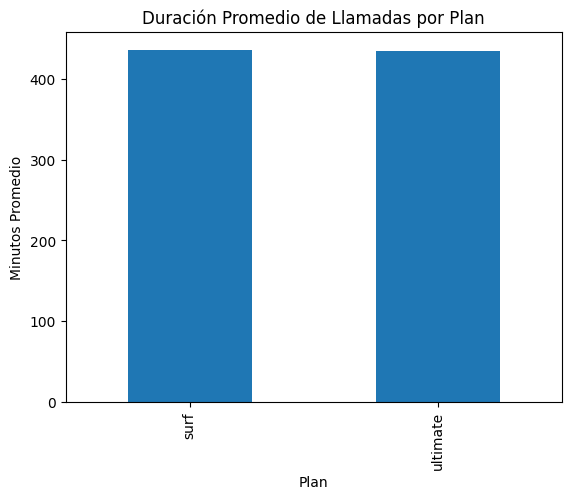

month
1     196.666667
2     366.333333
3     321.171429
4     347.197183
5     409.125000
6     420.361702
7     444.944134
8     418.956522
9     425.942238
10    443.988131
11    437.570720
12    478.269565
Name: minutes_used, dtype: float64


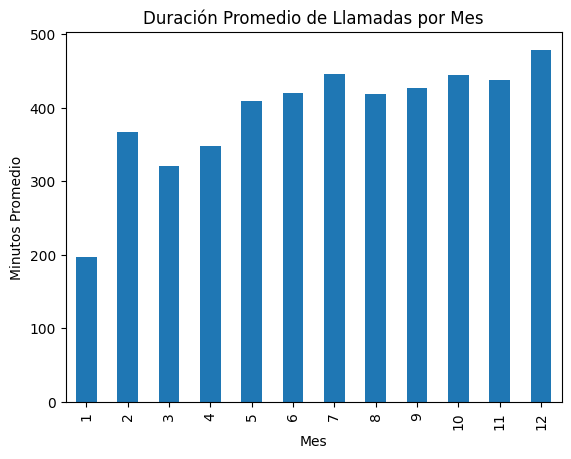

In [ ]:
# Comparando la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Duracion promedio por cada plan
average_plan = usage_data.groupby('plan_name')['minutes_used'].mean()
print(average_plan)

average_plan.plot(title='Duración Promedio de Llamadas por Plan', 
                  xlabel='Plan', 
                  ylabel='Minutos Promedio', 
                  kind='bar')
plt.show()

# Duracion promedio por cada mes
average_month = usage_data.groupby('month')['minutes_used'].mean()
print(average_month)

average_month.plot(title='Duración Promedio de Llamadas por Mes', 
                   xlabel='Mes', 
                   ylabel='Minutos Promedio', 
                   kind='bar')
plt.show()

Después de analizar el comportamiento de los clientes en relación con los planes Surf y Ultimate, se pueden decir que:

- Los usuarios de los planes Surf y Ultimate tienen una duración promedio de llamadas similar, con valores cercanos a 410-412 minutos por mes.
- A lo largo del año, la duración promedio de llamadas aumenta constantemente, alcanzando su punto máximo en diciembre.

    month  minutes_used
0       1         406.0
1       2        2673.0
2       3        7590.0
3       4       17577.0
4       5       30768.0
5       6       41836.0
6       7       54448.0
7       8       66438.0
8       9       80360.0
9      10      101846.0
10     11      119801.0
11     12      150680.0
    month  minutes_used
0       1         774.0
1       2        2822.0
2       3        3651.0
3       4        7074.0
4       5       11781.0
5       6       17435.0
6       7       25197.0
7       8       29922.0
8       9       37626.0
9      10       47778.0
10     11       56540.0
11     12       69324.0


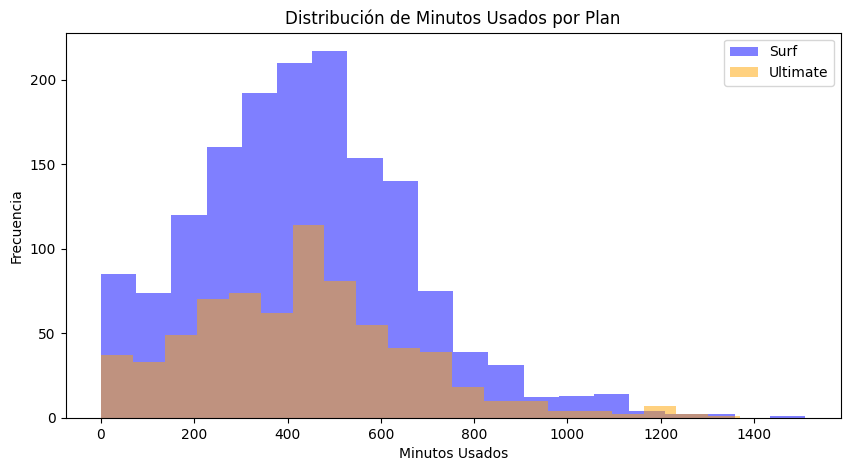

In [ ]:
# Comparando el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# plan surf
df_surf = usage_data[usage_data['plan'] == 'surf']  # Filtrar solo el plan "surf"
df_grouped = df_surf.groupby(['month'])['minutes_used'].sum().reset_index()
print(df_grouped)


# plan ultimate
df_ultimate = usage_data[usage_data['plan'] == 'ultimate']  # Filtrar solo el plan "surf"
df_grouped = df_ultimate.groupby(['month'])['minutes_used'].sum().reset_index()
print(df_grouped)


plt.figure(figsize=(10, 5))

plt.hist(df_surf['minutes_used'], bins=20, alpha=0.5, label='Surf', color='blue')
plt.hist(df_ultimate['minutes_used'], bins=20, alpha=0.5, label='Ultimate', color='orange')

plt.xlabel('Minutos Usados')
plt.ylabel('Frecuencia')
plt.title('Distribución de Minutos Usados por Plan')
plt.legend()
plt.show()

- Los usuarios del plan Surf tienen una mayor variabilidad en la cantidad de minutos usados, con un número significativo de clientes que superan el límite del plan.
- Los usuarios del plan Ultimate tienden a usar más minutos en promedio, pero tienen menos variabilidad debido a la cantidad generosa de minutos incluidos.

In [ ]:
# Calculando la media y la varianza de la duración mensual de llamadas.

# Calculando la media y la varianza de la duración mensual de llamadas
monthly_call_duration = usage_data.groupby('month')['minutes_used'].sum().reset_index()


# Media
mean_duration = monthly_call_duration.mean()
print("Media\n {}".format(mean_duration))

# Varianza
variance_duration = monthly_call_duration.var()
print("Varianza\n {}".format(variance_duration))


Media
 month               6.500000
minutes_used    82028.916667
dtype: float64
Varianza
 month           1.300000e+01
minutes_used    5.161699e+09
dtype: float64


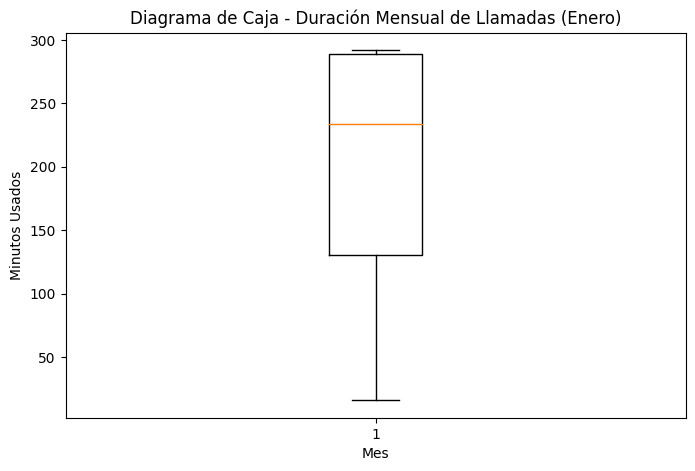

In [ ]:
# Trazando un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(8, 5))
plt.boxplot(usage_data[usage_data['month'] == 1]['minutes_used'])  # Filtra solo enero
plt.title("Diagrama de Caja - Duración Mensual de Llamadas (Enero)")
plt.ylabel("Minutos Usados")
plt.xlabel('Mes') 
plt.show()


El comportamiento de los usuarios varía en función del plan: Aquellos con el plan Surf parecen más propensos a limitar su uso o pagar cargos adicionales por excedente, mientras que los de Ultimate tienen un uso más constante y elevado.

### Mensajes

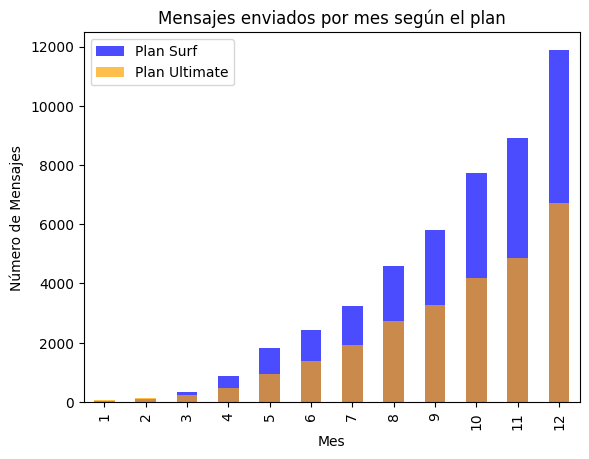

In [37]:


# Filtrar y agrupar datos
df_surf = usage_data[usage_data['plan'] == 'surf'].groupby('month')['total_messages'].sum()
df_ultimate = usage_data[usage_data['plan'] == 'ultimate'].groupby('month')['total_messages'].sum()

# Graficar ambos en el mismo gráfico
df_surf.plot(kind='bar', label='Plan Surf', color='blue', alpha=0.7)
df_ultimate.plot(kind='bar', label='Plan Ultimate', color='orange', alpha=0.7)

# Personalizar gráfico
plt.xlabel('Mes')
plt.ylabel('Número de Mensajes')
plt.title('Mensajes enviados por mes según el plan')
plt.legend()

plt.show()


- Los usuarios del plan Ultimate envían más mensajes en promedio, especialmente en la segunda mitad del año.
- Los usuarios de Surf envían menos mensajes, lo que sugiere que este servicio no es tan crucial para ellos.

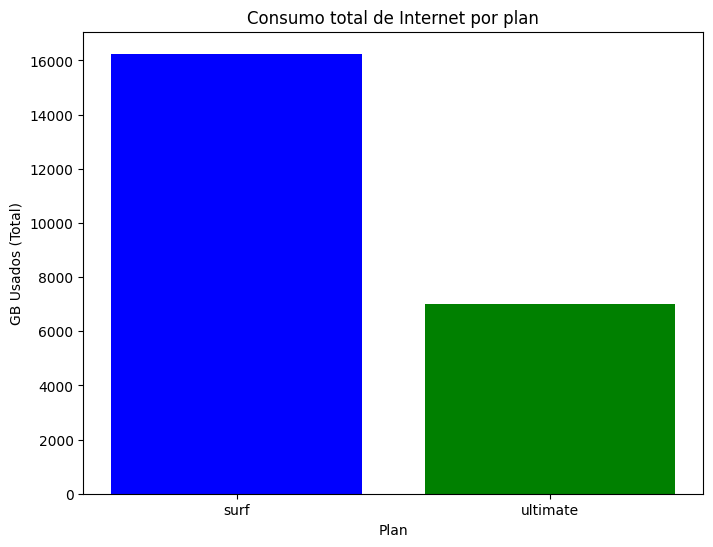

In [ ]:

# Comparando la cantidad de tráfico de Internet consumido por usuarios por plan
# Agrupar el consumo total de datos por plan
internet_usage = usage_data.groupby('plan')['gb_used'].sum().reset_index()

# Crear el gráfico de barras con matplotlib
plt.figure(figsize=(8, 6))
plt.bar(internet_usage['plan'], internet_usage['gb_used'], color=['blue', 'green'])

# Etiquetas y título
plt.xlabel('Plan')
plt.ylabel('GB Usados (Total)')
plt.title('Consumo total de Internet por plan')
plt.show()

- Los usuarios del plan Ultimate envían más mensajes en promedio que los de Surf
- El número de mensajes enviados aumenta a lo largo del año, con un mayor incremento en la segunda mitad del año.
- Los usuarios del plan Surf envían significativamente menos mensajes en comparación con Ultimate
- La diferencia en la cantidad de mensajes enviados sugiere que el plan Surf es elegido por usuarios que no dependen tanto de los SMS, mientras que los usuarios de Ultimate aprovechan más esta característica.

### Internet

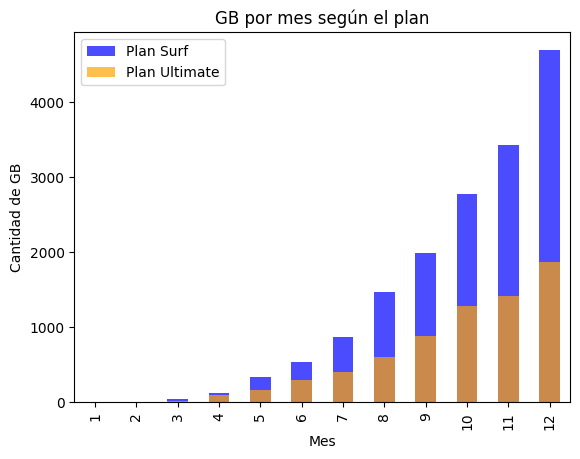

In [39]:

# Filtrar y agrupar datos
df_surf = usage_data[usage_data['plan'] == 'surf'].groupby('month')['gb_used'].sum()
df_ultimate = usage_data[usage_data['plan'] == 'ultimate'].groupby('month')['gb_used'].sum()

# Graficar ambos en el mismo gráfico
df_surf.plot(kind='bar', label='Plan Surf', color='blue', alpha=0.7)
df_ultimate.plot(kind='bar', label='Plan Ultimate', color='orange', alpha=0.7)

# Personalizar gráfico
plt.xlabel('Mes')
plt.ylabel('Cantidad de GB')
plt.title('GB por mes según el plan')
plt.legend()

plt.show()



- Los usuarios del plan Ultimate consumen más datos en comparación con Surf.
- A lo largo del año, el tráfico de Internet aumenta en ambos planes, pero Surf tiene un crecimiento más pronunciado.

## Ingreso

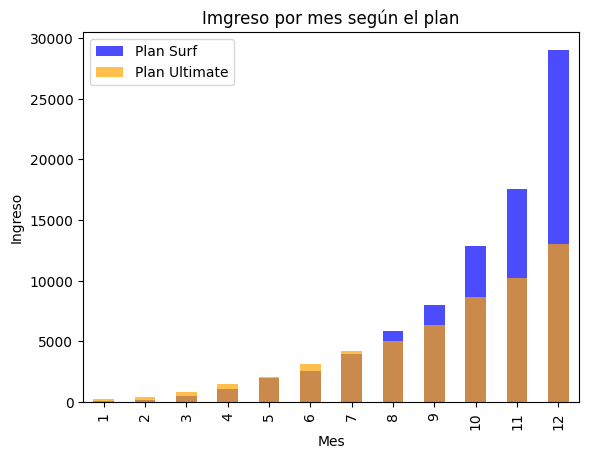

In [40]:


# Filtrar y agrupar datos
df_surf = usage_data[usage_data['plan'] == 'surf'].groupby('month')['monthly_income'].sum()
df_ultimate = usage_data[usage_data['plan'] == 'ultimate'].groupby('month')['monthly_income'].sum()

# Graficar ambos en el mismo gráfico
df_surf.plot(kind='bar', label='Plan Surf', color='blue', alpha=0.7)
df_ultimate.plot(kind='bar', label='Plan Ultimate', color='orange', alpha=0.7)

# Personalizar gráfico
plt.xlabel('Mes')
plt.ylabel('Ingreso')
plt.title('Imgreso por mes según el plan')
plt.legend()

plt.show()



- Ultimate genera más ingresos en total, pero la diferencia con Surf se reduce a finales del año.
- A medida que avanza el año, los ingresos de Surf aumentan más rápidamente, lo que indica un mayor pago por excedentes.

## Prueba las hipótesis estadísticas
- El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
- El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

In [ ]:
# Probando las hipótesis

# Extrayendo ingresos mensuales por usuario para cada plan
income_surf = usage_data[usage_data['plan'] == 'surf']['monthly_income']
income_ultimate = usage_data[usage_data['plan'] == 'ultimate']['monthly_income']

# Prueba t de Student
t_stat, p_value = stats.ttest_ind(income_surf, income_ultimate, equal_var=False)

print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Nivel de significancia
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Los ingresos son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa en los ingresos.")

Estadístico t: -8.5105
Valor p: 0.0000
Rechazamos la hipótesis nula: Los ingresos son significativamente diferentes.


In [42]:

# Prueba las hipótesis

# Extraer la región de la columna 'city' en users
users['region'] = users['city'].str.split(',').str[-1].str.strip()

# Unir users con usage_data usando la clave en común (por ejemplo, 'user_id')
usage_data = usage_data.merge(users[['user_id', 'region']], on='user_id', how='left')



# Filtrar ingresos correctamente dentro de usage_data
income_ny_nj = usage_data[usage_data['region'] == 'NY-NJ-PA MSA']['monthly_income']
income_other = usage_data[usage_data['region'] != 'NY-NJ-PA MSA']['monthly_income']

# Prueba de hipótesis

t_stat, p_value = stats.ttest_ind(income_ny_nj, income_other, equal_var=False)

print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Los ingresos en NY-NJ-PA son significativamente diferentes de los de otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa en los ingresos.")


Estadístico t: -1.7330
Valor p: 0.0836
No podemos rechazar la hipótesis nula: No hay diferencia significativa en los ingresos.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]



- Se observó una gran variabilidad en el consumo de llamadas y datos, mientras que el uso de mensajes fue más estable.
- La mayoría de los usuarios del plan Surf tienden a consumir sus recursos hasta el límite, lo que genera ingresos adicionales para la empresa.
- Los usuarios de Ultimate presentan un uso más predecible, con un consumo relativamente alto de llamadas y datos.
- Los usuarios de Surf son más propensos a pagar cargos adicionales por excedentes, lo que lo convierte en un plan altamente rentable.
- Los usuarios de Ultimate tienen un consumo más estable, lo que indica que el plan cubre sus necesidades sin necesidad de costos extra.
Se consideró la posibilidad de que algunos usuarios optaran por limitar su uso de servicios para evitar sobrecostos, lo que sugiere que las tarifas pueden influir en su comportamiento.
Decisiones metodológicas y supuestos clave:

Se utilizó el análisis exploratorio de datos (EDA) para identificar patrones y anomalías en el uso de servicios.
Se asumió que las tendencias observadas en un mes son representativas del comportamiento anual de los usuarios, aunque se reconocen posibles variaciones estacionales.
Se decidió emplear diagramas de caja para visualizar la distribución de uso y detectar posibles valores atípicos en llamadas y datos.
Se compararon los ingresos de cada plan, considerando tanto las tarifas base como los costos adicionales por excedentes.
Recomendaciones estratégicas para Megaline:

Optimización de planes: Se sugiere analizar si los límites de Surf pueden ajustarse para mejorar la retención de clientes sin afectar la rentabilidad.
Segmentación de usuarios: Una estrategia de marketing diferenciada podría incentivar a ciertos clientes a migrar a Ultimate si su consumo justifica un plan más caro.
Promociones y descuentos: Implementar descuentos en mensajes o datos adicionales podría incentivar el consumo y fidelizar a los clientes.
Monitoreo continuo: Se recomienda seguir analizando los datos periódicamente para detectar cambios en los patrones de consumo y ajustar las estrategias comerciales en consecuencia